## Objects  

### Cylinder

In [2]:
from src.canhydro.Cylinder import Cylinder

The Cylinder class is used to represent the 3-D cylinders that make up a QSM 

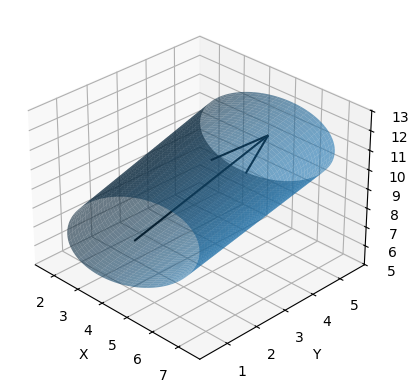

In [1]:
# A trivial example of a Cylinder object
from src.canhydro.Cylinder import Cylinder
myCyl = Cylinder(cyl_id=1.0,
            x=[3,6],         
            y=[2,4],         
            z=[6,12],         
            radius=2.0,         
            length=0.064433,         
            branch_order=0.0,         
            branch_id=0.0,         
            volume=0.010021,         
            parent_id=0.0,         
            reverse_branch_order=32.0,         
            segment_id=0.0)

fig = myCyl.draw_3D(show=True, draw_vectors=True)

The most important function of Cylinder objects is their ability to return data regarding the projections onto planes. \
Cylider objects utilize our custom 'geometry' module to calculate their projections onto the XY, XZ and YZ planes. 

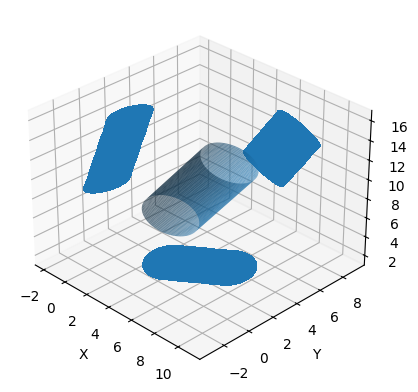

'myCyl' as seen from above
The 'XY' projection of myCyl as an area of 25.19 cm^3
       and the cylinder makes an angle of 1.03 radians with the XY plane
The 'XZ' projection of myCyl as an area of 30.42 cm^3
       and the cylinder makes an angle of 0.29 radians with the XZ plane
The 'YZ' projection of myCyl as an area of 30.68 cm^3
       and the cylinder makes an angle of 0.44 radians with the YZ plane


In [6]:
# Here we show the 3D view and the 3 possible 2D projections of a Cylinder object
from src.canhydro.Cylinder import Cylinder


myCyl = Cylinder(cyl_id=1.0,
            x=[3,6],         
            y=[2,4],         
            z=[6,12],         
            radius=2.0,         
            length=0.064433,         
            branch_order=0.0,         
            branch_id=0.0,         
            volume=0.010021,         
            parent_id=0.0,         
            reverse_branch_order=32.0,         
            segment_id=0.0)

fig = myCyl.draw_3D(show=True, draw_projections=True)

myCyl.get_projection('XY')
print("'myCyl' as seen from above")
print(f"The 'XY' projection of myCyl as an area of {round(myCyl.projected_data['XY']['area'],2)} cm^3")
print(f"       and the cylinder makes an angle of {round(myCyl.projected_data['XY']['angle'],2)} radians with the XY plane")

myCyl.get_projection('XZ')
print(f"The 'XZ' projection of myCyl as an area of {round(myCyl.projected_data['XZ']['area'],2)} cm^3")
print(f"       and the cylinder makes an angle of {round(myCyl.projected_data['XZ']['angle'],2)} radians with the XZ plane")

myCyl.get_projection('YZ')
print(f"The 'YZ' projection of myCyl as an area of {round(myCyl.projected_data['YZ']['area'],2)} cm^3")
print(f"       and the cylinder makes an angle of {round(myCyl.projected_data['YZ']['angle'],2)} radians with the YZ plane")

In the above 3D representations, the entire surface of cylinder must be calculated, s this may be computationally intensive. \
As such, the 'get_projection' function calculates statistics regarding 2D projections directly instead.

'myCyl' as seen from above


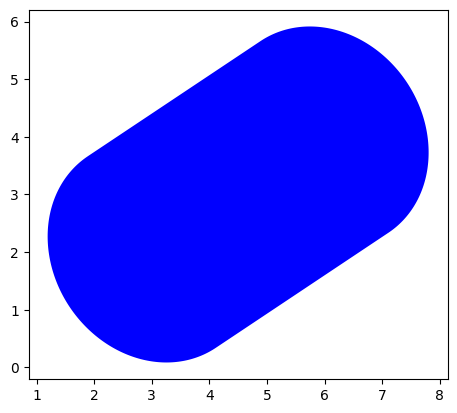

'myCyl' as seen from the 'front' of the tree


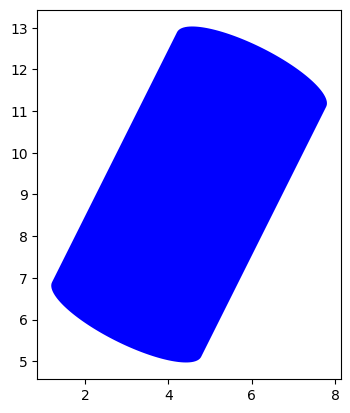

'myCyl' as seen from one 'side' of the tree


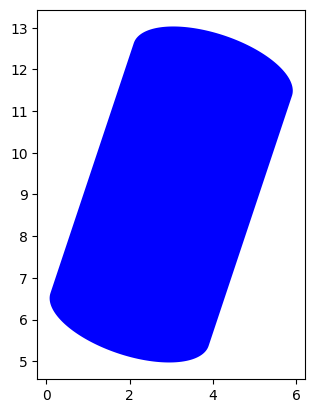

In [8]:
# The get_projection function allows for the retrieval of 
# projection data without the need to define the entire surface of the cylinder
import matplotlib.pyplot as plt

myCyl = Cylinder(cyl_id=1.0,
            x=[3,6],         
            y=[2,4],         
            z=[6,12],         
            radius=2.0,         
            length=0.064433,         
            branch_order=0.0,         
            branch_id=0.0,         
            volume=0.010021,         
            parent_id=0.0,         
            reverse_branch_order=32.0,         
            segment_id=0.0)

print("'myCyl' as seen from above")
myCyl.get_projection('XY')
myCyl.draw(plane='XY')
plt.show()

print("'myCyl' as seen from the 'front' of the tree")
myCyl.get_projection('XZ')
myCyl.draw(plane='XZ')
plt.show()

print("'myCyl' as seen from one 'side' of the tree")
myCyl.get_projection('YZ')
myCyl.draw(plane='YZ')
plt.show()

### Cylinder Collection 

Cylinder collections are just as they sound and, at the most basic level, a cyliner collection is defined as a list of 1 or more Cylinder objects \
Below, we initialize a cylinder collection using cylinder data stored in a CSV file.

In [1]:
# Example showing the most basic possible cylinder Collection4
from src.canhydro.CylinderCollection import CylinderCollection
from matplotlib import pyplot as plt    

myCollection = CylinderCollection()
# The below file is one of our several testing files, featuring only
# the trunk of a tree and one of its branches
myCollection.from_csv('5_SmallTree.csv','data/input/')

#by filtering for cyl_id>100, we are only plotting the 
# cylinders that are part of the branch
myCollection.draw('3D',show=False, filter_lambda=lambda: cyl_id>100)

print('XZ Projection of a collection of cylinders ')

XZ Projection of a collection of cylinders 


Cylinder Collection objects are often 1-1 with a QSM, and differ from QSMs in that they have been given additional structure via attributes and methods. 

In [ ]:
#Example printing out a png of a cylinder collection, as well as a list of attributes

The most important of these attributes is CylinderCollection.digraph, which is a mathematical graph corresponding the CylinderCollection. \ 
This graph representation is used in tandem with a traversal algoritm to predict which rain partition each cylinder in the collection belongs to

In [ ]:
# Code example printing out a cylinder collection, colored by stem v. drip flow

Alpha shapes are another key attribute used in statistics calculations. \
Alpha shapes represent the estimated area covered by the represented tree's canopy when projected in the XY, XZ or YZ direction. \
**these shapes are particularly important in the calculation of Woody Index (see statistics_calculations for more info)

In [ ]:
# A demonstration showing the calculation and plotting of alpha shapes 

The remaining attributes of a CylinderCollection consists primarily of summarry statistics. \
Statistics may be calculated using dedicated functions, or they may be calculated via the overarching 'statistics' function. \
(see statistics_calculations for more info)

In [ ]:
# Demonstrating several options for working with statistics

# A few statistic specific functions 

# Results obtained through the bulk statistics function


#

### Forester

Forester objects allow users to conveniently create and manage Cylinder Collections. In particular, Foresters are useful for reading in and processing QSM files.


In [1]:
# Importing our local version of the forester object
from src.canhydro.Forester import Forester

When a Forester object is created, available file names are read from the default directory, './data/input/'. \
This list of available files can be accessed through the Forester.file_names attribute, as shown below

In [2]:
# Creating a new Forester object
myForester = Forester()
print(f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}")

Files available in data/input: ['data/input/5_SmallTree.csv']


Optionally, a custom path may be passed to the Forester object, In which case, the Forester will look for files in the passed directory instead

In [3]:
# Passing a custom directory to the Forester object will change the directory attribute
directory = '/data/test/'
myForester = Forester('data/test/')
print(f"Files available in {myForester.directory}: {list(map(str,myForester.file_names))}")

Files available in data/test/: ['data/test/10_MediumCollection.csv', 'data/test/1_TenCyls.csv', 'data/test/3_HappyPathWTrunk.csv', 'data/test/2_EZ_projection.csv', 'data/test/4_LargeCollection.csv', 'data/test/5_SmallTree.csv', 'data/test/6_LargeTree.csv', 'data/test/8_DripPathMidBranch.csv', 'data/test/7_DripPathAdjToTrunk.csv', 'data/test/9_DripOnTrunk.csv']


The 'qsm_to_collection' function can be used create CylinderCollections from a specified file.

In [12]:
# Importing a QSM file as a CylinderCollection
myForester = Forester('data/test/')
myForester.qsm_to_collection('5_SmallTree.csv')

cylCollections = myForester.cylinder_collections
firstCollection = cylCollections[0]

print(f"Forester has {len(cylCollections)} CylinderCollection, imported from {cylCollections[0].file_name}")

Forester has 1 CylinderCollection, imported from 5_SmallTree.csv


If 'All' is provided as the file name, all of the files in the given directory will be read in as CylinderCollections. \
(Note that this may require a significant amount of memory.)

In [13]:
# Reading in all files in the directory as collections
myForester.qsm_to_collection('All')
cylCollections = myForester.cylinder_collections
firstCollection = cylCollections[0]
print(f"""Forester created {len(cylCollections)} CylinderCollections, imported from the following files 
      {list(map(lambda x: x.file_name,cylCollections))}""")

Forester created 10 CylinderCollections, from the following files 
      ['10_MediumCollection.csv', '1_TenCyls.csv', '3_HappyPathWTrunk.csv', '2_EZ_projection.csv', '4_LargeCollection.csv', '5_SmallTree.csv', '6_LargeTree.csv', '8_DripPathMidBranch.csv', '7_DripPathAdjToTrunk.csv', '9_DripOnTrunk.csv']


## Configuration Options

### Directories

### File Structure

### Model Parameters
